# Sliding Mean

When plotting data, the physical signal you want to present might be obscured by large noise (random) fluctuations overlapped to it.

A simple trick to show the data is to average the data in a “sliding window” on the “x-axis” and plot it 
overlapped to the original data.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

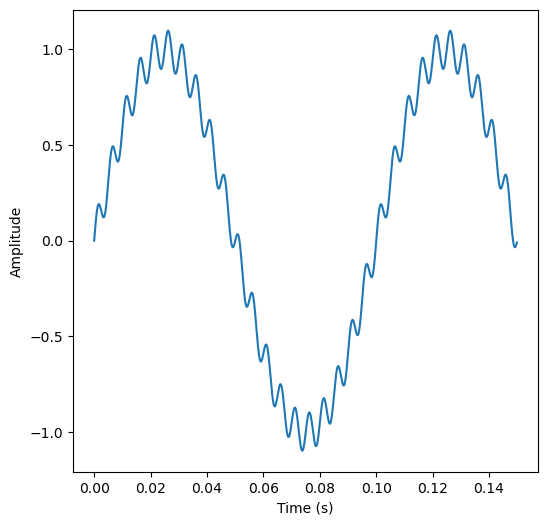

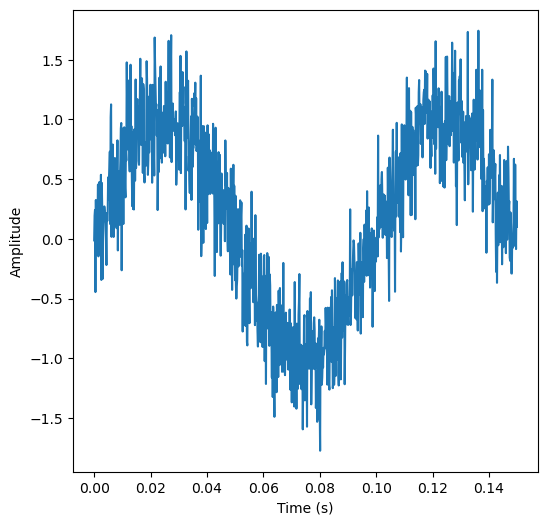

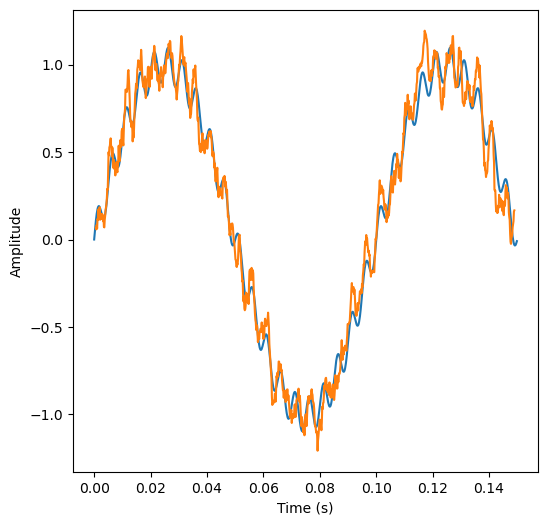

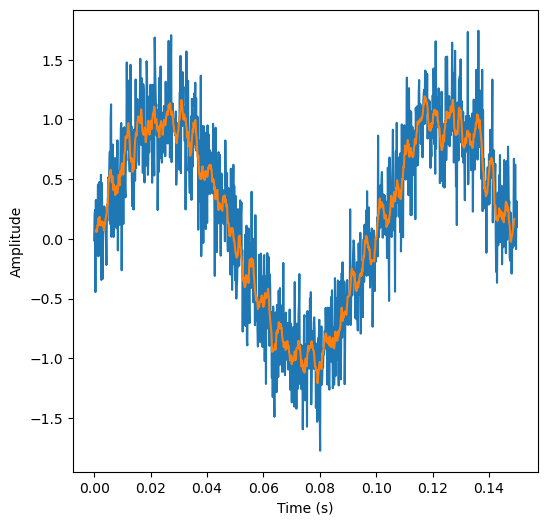

In [2]:
# Overlap a signal made of two sinusoids with a large gaussian noise

# Define the first sinusoid
A1 = 1
T1 = 0.1
freq1 = 1./ T1

# Define the second sinusoid
A2 = 0.1
T2 = 0.005
freq2 = 1./ T2

# Generate time vector
n = 1000
start = 0
stop = 1.5*T1
stepsize = (stop-start)/float(n)
t = np.arange(start, stop, stepsize) #(0, 1.5*T1, 1.5*T1/float(n)) #(start, stop, nsteps)

# Compute the signal
# y = A1 * np.sin(2 * np.pi * freq1 * t )
# y = A2 * np.sin(2 * np.pi * freq2 * t ) 
y = A1 * np.sin(2 * np.pi * freq1 * t ) + A2 * np.sin(2 * np.pi * freq2 * t ) 

# Plot signal
plt.figure(figsize=[6,6])
plt.plot(t, y)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

# Generate NoisePlot signal + noise
noise_amplitude = 0.3
noise = noise_amplitude * np.random.normal(0,1,n) # gaussian centred at 0, sigma =1, n-points
ynoise = y + noise

# Plot signal + noise
plt.figure(figsize=[6,6])
plt.plot(t, ynoise)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

# sliding window
def sliding_window(array, window_size):
    result = []
    for i in range(len(array) - window_size + 1):
        window = array[i:i + window_size]
        result.append(window.mean())
    return result

# Define the size of the window to compute the mean in time
windowsize = T2/3 #  e.g. a third of the high freq sinusoid
# translate it to steps in the time vector
windowsizeinarraysteps = int(windowsize / stepsize)

windows = sliding_window(ynoise, windowsizeinarraysteps)

# shift to the centre of the window for plotting
shift = int(windowsizeinarraysteps/2) -1
tw = t[0+shift :len(t) - windowsizeinarraysteps + 1 +shift]

# Plot signal + noise averaged over the window
plt.figure(figsize=[6,6])
plt.plot(t, y)
plt.plot(tw, windows)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

# overlap all three plots
# Plot signal + noise averaged over the window
plt.figure(figsize=[6,6])
plt.plot(t, ynoise)
#plt.plot(t, y)
plt.plot(tw, windows)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')


#show all plots
plt.show()
